<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_ED01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Actividad ED0: Melanie Andrea Muñoz Chavarria**
# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}


# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación difirencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


Para el oscilador aromónico anterior, escribir un programa con extension py que permita dar escribir la velocidad y la posicion
como funcion del tiempo.

La ejecucion del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

##**Decaimiento radiactivo**

In [2]:
#Definiendo la función del decaimiento radiactivo
def dec(t,alpha,N):
  return (-1)*alpha*N

###**Método de Euler**

Para
\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N=f(N,t)
\end{equation}

se presenta una ecuación separable, pues note que el lado derecho de la igualdad se puede expresar como: $$ f(N,t)=-\lambda N + 0t$$

Entonces el código en markdown para el código de Euler está dado por:

Considerando la definción de derivada
\begin{equation}
\frac{dN}{dt} = \lim_{{\Delta \tilde{t} \to 0}} \frac{(N(\tilde{t}+\Delta \tilde{t}) - N(\tilde{t}))}{\Delta \tilde{t}}
\end{equation}

Entonces,
\begin{equation}
f(N,t) = \lim_{{\Delta \tilde{t} \to 0}} \frac{(N(\tilde{t}+\Delta \tilde{t}) - N(\tilde{t}))}{\Delta \tilde{t}}
\end{equation}

Es decir,
\begin{equation}
-\lambda N(\tilde{t}) = \lim_{{\Delta \tilde{t} \to 0}} \frac{(N(\tilde{t}+\Delta \tilde{t} ) - N(\tilde{t}))}{\Delta \tilde{t}}
\end{equation}

De allí,
\begin{equation}
N(\tilde{t}+\Delta \tilde{t})= N(\tilde{t})+ \Delta \tilde{t} (-\lambda N(\tilde{t}))
\end{equation}

Entonces con a deducción anterior,

1. Se suponen los como valores inciales $N(0)=100$  átomos y $\lambda= 1$

2. Se crea la función f(N,t), que en este caso solo es $-\lambda N$

3. Se genera una valor mínimo y un valor máximo para los datos de la varaible idependiente h , es decir, un intervalo entre dos valores en los cuales evaluar la función que se definio antes.

4. Se define el número de pasos entre esos valores, n.

5. Ahora, se crea una lista de datos

In [3]:
#Realizando una función que haga el cálculo

def euler_dec(t_in,t_fin,numero_intervalo,N_inicial,alpha):
  #Para alamacenar los resultados del caimiento
  t=np.linspace(t_in,t_fin,numero_intervalo)
  N=np.zeros(numero_intervalo)

  #El cambio en el tiempo es:
  delta_t=t[1]-t[0]

  #Guardando el primer valor
  N[0]=N_inicial

  #Aplicando el método de Euler
  for i in range(0,numero_intervalo-1):
    N[i+1]=N[i]+ delta_t*dec(t[i],alpha,N_inicial)
    N_inicial=N[i+1]

  return N


In [4]:
#Suponiendo los valores inciales
alpha=1
N_0=100
t_i=0

#El valor final de tiempo
t_f=10

#Con intervalos de
n=100

N_=euler_dec(t_i,t_f,n,N_0,alpha)

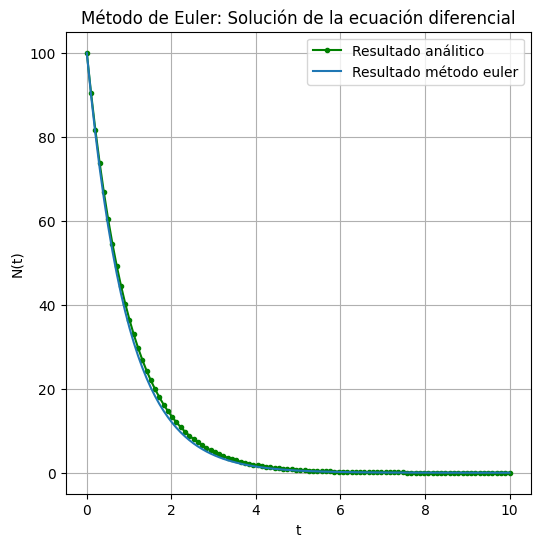

In [5]:
#La solcuión de esta EDO, esta dada por:
f= lambda t,N: N*np.exp(-alpha*t)

t_=np.linspace(t_i,t_f,n)

#Graficando el resultado
fig,ax=plt.subplots(nrows=1,ncols=1, figsize=(6,6))
ax.plot(t_,f(t_,N_0), '.g-', label='Resultado análitico')
ax.set_title('Método de Euler: Solución de la ecuación diferencial')
ax.plot(t_,N_,label='Resultado método euler')
ax.set_ylabel('N(t)')
ax.set_xlabel('t')
ax.grid()
ax.legend()

###**Método de Runge-Kutta**

In [6]:
#Defiendo la función que permita desarollar el método para el decaimiento
def rk4_dec(t_0,N_in,h_t,num_inter,alpha):

  #Tiempo máximo
  tmax=h_t*num_inter

  #Intervalo de tiempo
  t_int=np.arange(t_0,tmax,h_t)

  #Para guardar la evolción de dec

  N_=np.zeros(len(t_int))
  N_[0]=N_in

  #Aplicando el método
  for i in range(0,len(t_int)-1):
    k1=dec(t_int[i],alpha,N_[i])
    k2=dec(t_int[i]+(h_t/2),alpha,N_[i]+(h_t/2)*k1)
    k3=dec(t_int[i]-(h_t/2),alpha,N_[i]+(h_t/2)*k2)
    k4=dec(t_int[i]+h_t,alpha,N_[i]+(h_t)*k3)

    N_[i+1]=N_[i]+(h_t/6)*(k1+2*k2+2*k3+k4)

  return N_

Text(0.5, 1.0, 'r4k: Decaimiento radiactivo')

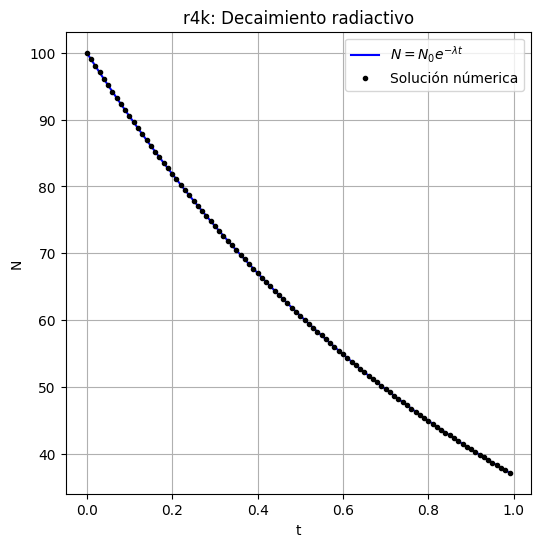

In [7]:
#Aplicando el método para los valores propuestos antes
N1=rk4_dec(t_i,N_0,0.01,n,alpha)

#Defiendo el intervalo para graficarlo
tmax=0.01*n
t1=np.arange(t_i,tmax,0.01)

#Graficando los resultados
fig,ax=plt.subplots(nrows=1,ncols=1, figsize=(6,6))
ax.plot(t1,N1,'b-',ms=2,label='$N=N_0e^{-\lambda t}$')
ax.plot(t1,f(t1,N_0),'.k',label='Solución númerica')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('N')
ax.grid()
ax.set_title('r4k: Decaimiento radiactivo')

##**Oscilador armónico**

In [8]:
#Para un oscilador armónico
def oscilador_armonico(t,pvi, k,m,b):
  #Constantes
  g=b/m
  w=np.sqrt(k/m)

  #Parametros de los vectores
  dxdt=pvi[1]
  dvdt=-g*pvi[1]-(w**2)*pvi[0]

  #Vector
  r=np.array([dxdt,dvdt])

  return r


###**Método de Euler**

In [9]:
def euler_osiclador(v_i,x_i,k,m,b,t_in,t_max,numero_intervalo):

  #Denienco el PVI
  pvi_=np.array([x_i,v_i])

  #Intervalo para evaluar el sistema
  t=np.linspace(t_in,t_max,numero_intervalo)

  #Delta de tiempo
  h=t[1]-t[0]

  #Variables para almacenar el resultado
  x=np.zeros(len(t))
  v=np.zeros(len(t))

  #Almacenando los PVI
  x[0]=pvi_[0]
  v[0]=pvi_[1]

  #Evolcuión método de Euler
  for i in range(0,len(t)-1):
    x[i+1]=x[i]+h*oscilador_armonico(t,pvi_,k,m,b)[0]
    v[i+1]=v[i]+h*oscilador_armonico(t,pvi_,k,m,b)[1]
    pvi_=np.array([x[i+1],v[i+1]])

  dicc_o={'Tiempo [s]': t, 'Posición [m]': x, 'Velocidad [m/s]': v}

  #Convierto el archivo un DataFrame

  df=pd.DataFrame(dicc_o)

  return df

In [10]:
#PVI
v0=1e-12
x0=2
t0=0
tf=10
n=1000


#Parametros
k=4
m=2
b=1

In [11]:
df=euler_osiclador(x0,v0,k,m,b,t0,tf,n)
df

,Tiempo [s],Posición [m],Velocidad [m/s]
0,0.00000,1.000000e-12,2.000000
1,0.01001,2.002002e-02,1.989990
2,0.02002,3.993984e-02,1.979629
3,0.03003,5.975595e-02,1.968922
4,0.04004,7.946487e-02,1.957871
...,...,...,...
995,9.95996,1.271244e-01,0.011449
996,9.96997,1.272390e-01,0.008846
997,9.97998,1.273275e-01,0.006255
998,9.98999,1.273901e-01,0.003674


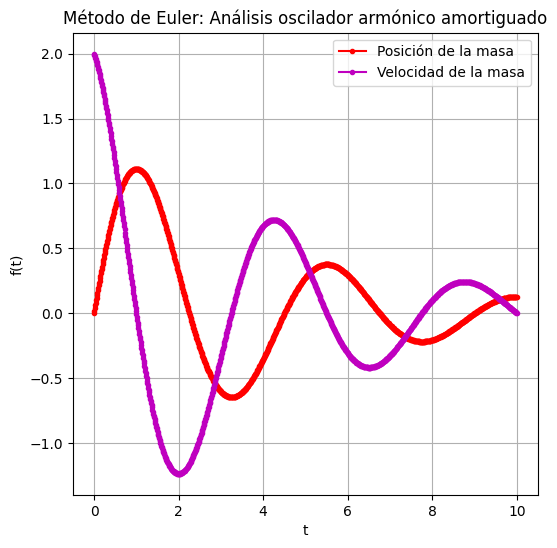

In [12]:
#Graficando los resultados
fig1,ax1=plt.subplots(nrows=1,ncols=1, figsize=(6,6))
ax1.plot(df['Tiempo [s]'],df['Posición [m]'],'.r-', label='Posición de la masa')
ax1.plot(df['Tiempo [s]'],df['Velocidad [m/s]'],'.m-',label='Velocidad de la masa')
ax1.set_xlabel('t')
ax1.set_ylabel('f(t)')
ax1.set_title('Método de Euler: Análisis oscilador armónico amortiguado')
ax1.grid()
ax1.legend()



###**Método de Runge-Kutta**

In [13]:
def rk4_oscilador(t_i,t_f,x_0,v_0,n,k,m,b):
  ti=np.linspace(t_i,t_f,n)
  h=ti[1]-ti[0]
  #Para guardar los ceros y asignado los valores iniciales
  x_=np.zeros(n)
  x_[0]=x_0
  v_=np.zeros(n)
  v_[0]=v_0

  for i in range(0,n-1):
    mitad_h=np.array([h/2,h/2])
    punto_h=np.array([h,h])

    pvi=np.array([x_[i],v_[i]])

    k1=oscilador_armonico(ti[i],pvi,k,m,b)
    k2=oscilador_armonico(ti[i]+(h/2),pvi+mitad_h,k,m,b)
    k3=oscilador_armonico(ti[i]-(h/2),pvi+mitad_h,k,m,b)
    k4=oscilador_armonico(ti[i]+h,pvi+punto_h,k,m,b)

    #Espacio
    x_[i+1]=x_[i]+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
    #Velocidad
    v_[i+1]=v_[i]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])

  dicc_o={'Tiempo [s]': ti, 'Posición [m]': x_, 'Velocidad [m/s]': v_}

  #Convierto el archivo un DataFrame

  df=pd.DataFrame(dicc_o)

  return df

In [14]:
#Valores inciales
t_0=0
x_0=1
v_0=2



#Constantes oscilador
k_=8
b_=0
m_=2
n_=1000

In [15]:
df_=rk4_oscilador(t_0,10,x_0,v_0,n_,k_,m_,b_)
df_

,Tiempo [s],Posición [m],Velocidad [m/s]
0,0.00000,1.000000,2.000000
1,0.01001,1.020070,1.959760
2,0.02002,1.039737,1.918716
3,0.03003,1.058994,1.876884
4,0.04004,1.077832,1.834281
...,...,...,...
995,9.95996,1.658503,-0.974510
996,9.96997,1.648798,-1.041116
997,9.97998,1.638426,-1.107335
998,9.98999,1.627392,-1.173138


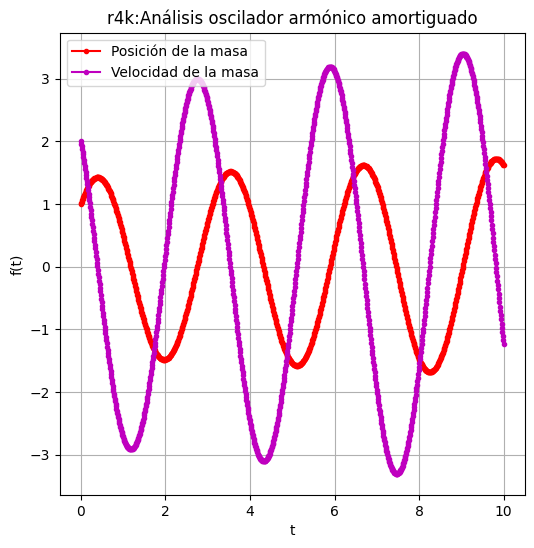

In [16]:
#Graficando los resultados
fig2,ax2=plt.subplots(nrows=1,ncols=1, figsize=(6,6))
ax2.plot(df_['Tiempo [s]'],df_['Posición [m]'],'.r-', label='Posición de la masa')
ax2.plot(df_['Tiempo [s]'],df_['Velocidad [m/s]'],'.m-',label='Velocidad de la masa')
ax2.set_xlabel('t')
ax2.set_ylabel('f(t)')
ax2.set_title('r4k:Análisis oscilador armónico amortiguado')
ax2.grid()
ax2.legend()




Ahora creando el archivo .txt con los datos

In [17]:
df_str=df.to_string(index=False)
df_str_=df_.to_string(index=False)

titulo='Oscilador armónico armotiguado'

with open(titulo, 'w') as archivo:
    archivo.write(f'DataFrame 1:\n{df_str}\n\n')
    archivo.write(f'DataFrame 2:\n{df_str_}\n\n')
